## Importação dos dados



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

Faturamento total por loja:
Loja 1: R$ 1,534,509.12
Loja 2: R$ 1,488,459.06
Loja 3: R$ 1,464,025.03
Loja 4: R$ 1,384,497.58


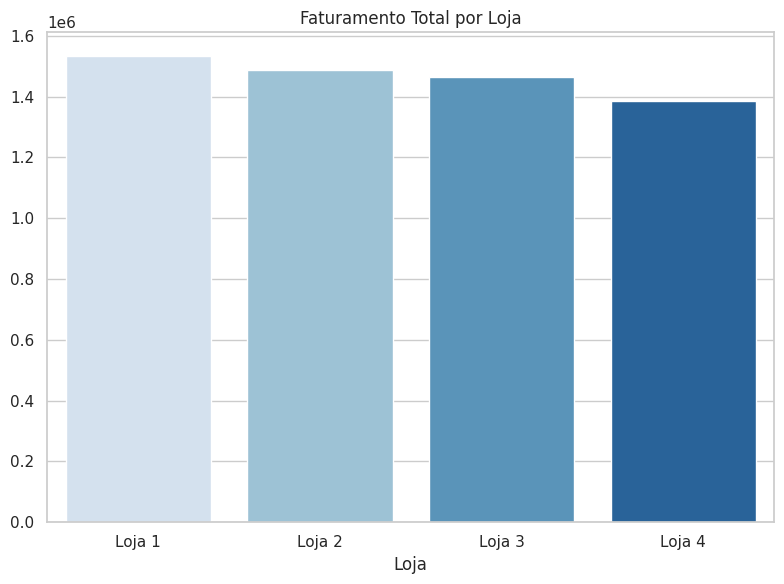

Faturamento por categoria:
Loja 1 - brinquedos: R$ 23,993.78
Loja 1 - eletrodomesticos: R$ 484,913.36
Loja 1 - eletronicos: R$ 572,659.23
Loja 1 - esporte e lazer: R$ 52,387.55
Loja 1 - instrumentos musicais: R$ 121,731.69
Loja 1 - livros: R$ 11,713.92
Loja 1 - moveis: R$ 250,178.11
Loja 1 - utilidades domesticas: R$ 16,931.48
Loja 2 - brinquedos: R$ 21,262.21
Loja 2 - eletrodomesticos: R$ 464,758.13
Loja 2 - eletronicos: R$ 547,773.71
Loja 2 - esporte e lazer: R$ 46,326.09
Loja 2 - instrumentos musicais: R$ 139,987.03
Loja 2 - livros: R$ 13,454.35
Loja 2 - moveis: R$ 235,234.68
Loja 2 - utilidades domesticas: R$ 19,662.86
Loja 3 - brinquedos: R$ 25,869.20
Loja 3 - eletrodomesticos: R$ 438,984.89
Loja 3 - eletronicos: R$ 547,699.92
Loja 3 - esporte e lazer: R$ 47,456.10
Loja 3 - instrumentos musicais: R$ 103,174.45
Loja 3 - livros: R$ 12,664.70
Loja 3 - moveis: R$ 268,095.56
Loja 3 - utilidades domesticas: R$ 20,080.21
Loja 4 - brinquedos: R$ 27,015.67
Loja 4 - eletrodomesticos: R$ 377

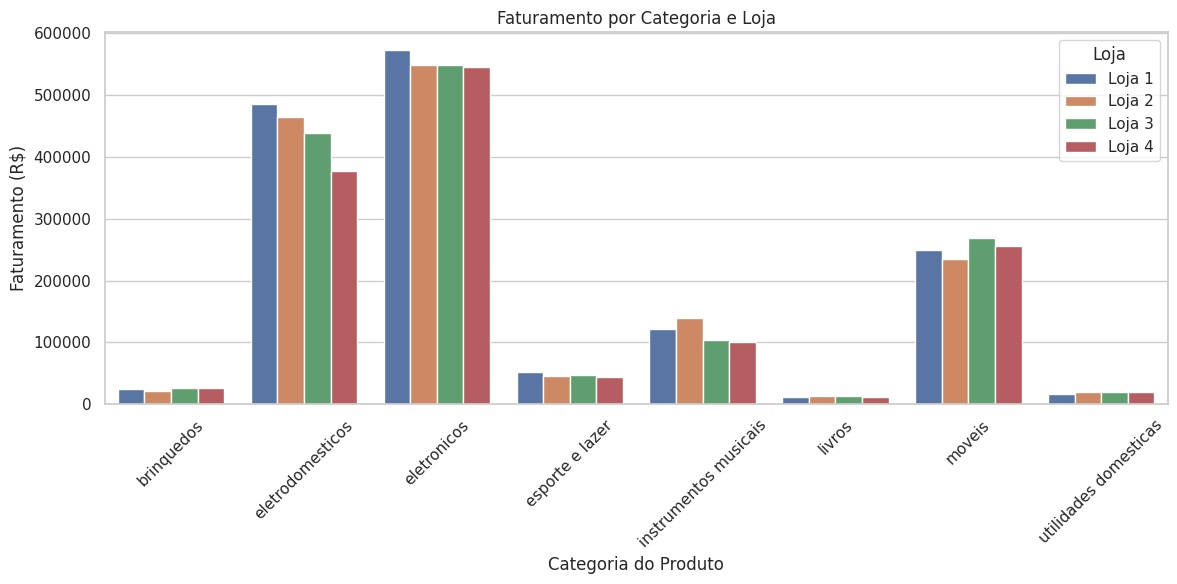

Avaliação média por loja:
Loja 1: 3.98
Loja 2: 4.04
Loja 3: 4.05
Loja 4: 4.00


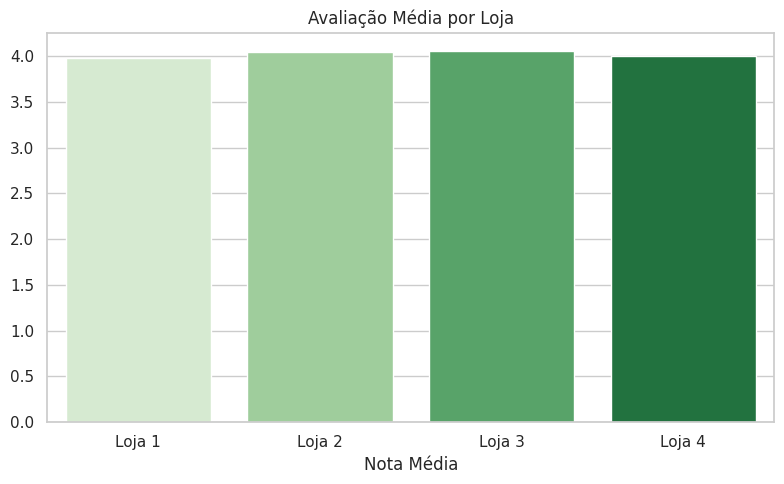

Frete médio por loja:
Loja 1: R$ 34.69
Loja 2: R$ 33.62
Loja 3: R$ 33.07
Loja 4: R$ 31.28


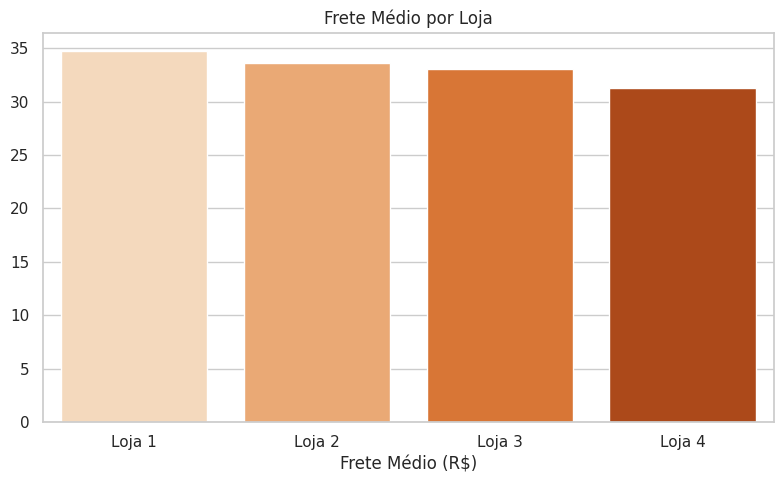

Produtos mais e menos vendidos por loja:

Loja 1:
Mais vendido: Micro-ondas (vendido 60x)
Menos vendido: Headset (vendido 33x)
Produtos mais e menos vendidos por loja:

Loja 2:
Mais vendido: Iniciando em programação (vendido 65x)
Menos vendido: Jogo de tabuleiro (vendido 32x)
Produtos mais e menos vendidos por loja:

Loja 3:
Mais vendido: Kit banquetas (vendido 57x)
Menos vendido: Blocos de montar (vendido 35x)
Produtos mais e menos vendidos por loja:

Loja 4:
Mais vendido: Cama box (vendido 62x)
Menos vendido: Guitarra (vendido 33x)


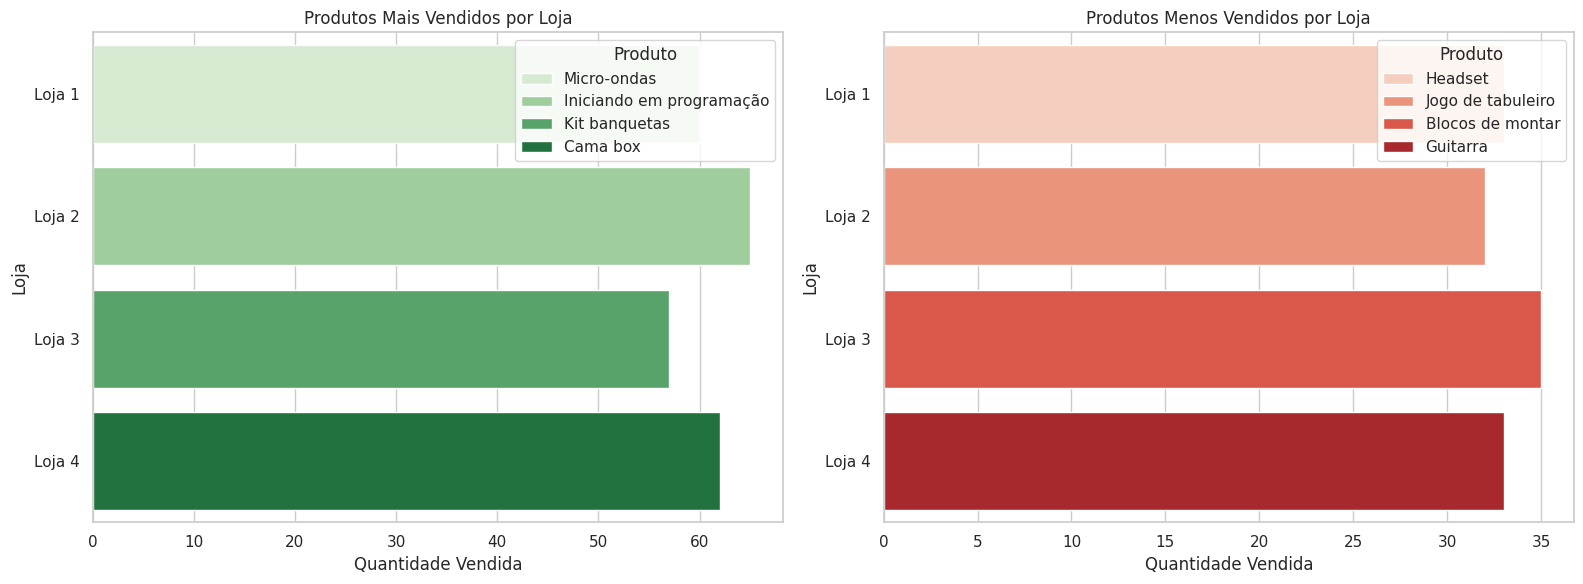



RELATÓRIO RESUMO:
--------------------------
Loja com menor faturamento: Loja 4 -> R$ 1,384,497.58
Loja com pior avaliação: Loja 1 -> Nota 3.98
Loja com frete mais caro: Loja 1 -> R$ 34.69


In [30]:
# Análise de Desempenho das Lojas Alura Store

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo
sns.set(style="whitegrid")

urls = {
    "Loja 1": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv",
    "Loja 2": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv",
    "Loja 3": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv",
    "Loja 4": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"
}

lista_lojas = []

for nome_loja, url in urls.items():
    df = pd.read_csv(url)
    df["Loja"] = nome_loja
    lista_lojas.append(df)

todas_lojas = pd.concat(lista_lojas, ignore_index=True)

# --------------------------
# Faturamento total por loja
# --------------------------
todas_lojas["Preço"] = pd.to_numeric(todas_lojas["Preço"], errors="coerce")

faturamento_lojas = todas_lojas.groupby("Loja")["Preço"].sum().sort_values(ascending=False)

print("Faturamento total por loja:")
for loja, valor in faturamento_lojas.items():
    print(f"{loja}: R$ {valor:,.2f}")

plt.figure(figsize=(8, 6))
sns.barplot(y=faturamento_lojas.values, x=faturamento_lojas.index, hue=faturamento_lojas.index, palette="Blues", legend=False)
plt.title("Faturamento Total por Loja")
plt.tight_layout()
plt.show()

# --------------------------
# Faturamento por categoria
# --------------------------
vendas_categoria = (
    todas_lojas.groupby(["Loja", "Categoria do Produto"])["Preço"].sum().reset_index()
)
print("Faturamento por categoria:")
for _, row in vendas_categoria.iterrows():
    loja = row["Loja"]
    categoria = row["Categoria do Produto"]
    valor = row["Preço"]
    print(f"{loja} - {categoria}: R$ {valor:,.2f}")

plt.figure(figsize=(12, 6))
sns.barplot(data=vendas_categoria, x="Categoria do Produto", y="Preço", hue="Loja")
plt.title("Faturamento por Categoria e Loja")
plt.xticks(rotation=45)
plt.ylabel("Faturamento (R$)")
plt.tight_layout()
plt.show()

# --------------------------
# Avaliação média por loja
# --------------------------
avaliacoes = todas_lojas.groupby("Loja")["Avaliação da compra"].mean().round(2)

print("Avaliação média por loja:")
for loja, valor in avaliacoes.items():
    print(f"{loja}: {valor:,.2f}")

plt.figure(figsize=(8, 5))
sns.barplot(y=avaliacoes.values, x=avaliacoes.index, hue=avaliacoes.index, palette="Greens", legend=False)
plt.title("Avaliação Média por Loja")
plt.xlabel("Nota Média")
plt.tight_layout()
plt.show()

# --------------------------
# Frete médio por loja
# --------------------------
frete_medio = todas_lojas.groupby("Loja")["Frete"].mean().round(2)

print("Frete médio por loja:")
for loja, valor in frete_medio.items():
    print(f"{loja}: R$ {valor:,.2f}")

plt.figure(figsize=(8, 5))
sns.barplot(y=frete_medio.values, x=frete_medio.index, hue=frete_medio.index, palette="Oranges", legend=False)
plt.title("Frete Médio por Loja")
plt.xlabel("Frete Médio (R$)")
plt.tight_layout()
plt.show()

# --------------------------
# Produto mais e menos vendido por loja
# --------------------------

dados_lojas = []

for loja in todas_lojas["Loja"].unique():
    df_loja = todas_lojas[todas_lojas["Loja"] == loja]
    produto_counts = df_loja["Produto"].value_counts()
    print("Produtos mais e menos vendidos por loja:")

    mais_vendido = produto_counts.idxmax()
    qtd_mais = produto_counts.max()

    menos_vendido = produto_counts.idxmin()
    qtd_menos = produto_counts.min()

    print(f"\n{loja}:")
    print(f"Mais vendido: {mais_vendido} (vendido {produto_counts.max()}x)")
    print(f"Menos vendido: {menos_vendido} (vendido {produto_counts.min()}x)")


    dados_lojas.append({
        "Loja": loja,
       "Produto Mais Vendido": mais_vendido,
        "Quantidade Mais Vendido": qtd_mais,
        "Produto Menos Vendido": menos_vendido,
        "Quantidade Menos Vendido": qtd_menos
    })

dados_produtos = pd.DataFrame(dados_lojas)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico dos produtos mais vendidos
sns.barplot(
    x="Quantidade Mais Vendido",
    y="Loja",
    hue="Produto Mais Vendido",
    data=dados_produtos,
    palette="Greens",
    dodge=False,
    ax=ax[0]
)
ax[0].set_title("Produtos Mais Vendidos por Loja")
ax[0].set_xlabel("Quantidade Vendida")
ax[0].set_ylabel("Loja")
ax[0].legend(title="Produto")

# Gráfico dos produtos menos vendidos
sns.barplot(
    x="Quantidade Menos Vendido",
    y="Loja",
    hue="Produto Menos Vendido",
    data=dados_produtos,
    palette="Reds",
    dodge=False,
    ax=ax[1]
)
ax[1].set_title("Produtos Menos Vendidos por Loja")
ax[1].set_xlabel("Quantidade Vendida")
ax[1].set_ylabel("Loja")
ax[1].legend(title="Produto")

plt.tight_layout()
plt.show()

# --------------------------
# Relatório
# --------------------------
print("\n\nRELATÓRIO RESUMO:")
print("--------------------------")
print(f"Loja com menor faturamento: {faturamento_lojas.idxmin()} -> R$ {faturamento_lojas.min():,.2f}")
print(f"Loja com pior avaliação: {avaliacoes.idxmin()} -> Nota {avaliacoes.min():.2f}")
print(f"Loja com frete mais caro: {frete_medio.idxmax()} -> R$ {frete_medio.max():.2f}")
